Подключаяюсь к PostgreSQL

In [2]:
!pip install psycopg2-binary

     |████████████████████████████████| 2.2 MB 784 kB/s eta 0:00:01


In [3]:
import psycopg2
import pandas as pd

In [4]:
dict_data = {
    "db_host": "178.154.254.133",   # хост
    "db_name": "skyeng",           # имя базы данных
    "db_password": "admin", # пароль
    "db_port": "5432",             # порт
    "db_user": "admin"      # имя пользователя
}

In [5]:
connection = psycopg2.connect(  
            database=dict_data['db_name'],       # имя базы данных
            user=dict_data['db_user'],     # имя пользователя
            password=dict_data['db_password'], # пароль
            host=dict_data['db_host'],   # хост
            port=dict_data['db_port'],             # порт
        )

In [6]:
cursor = connection.cursor()

In [7]:
query = "SELECT * FROM purchases"
cursor.execute(query)
purchases = cursor.fetchall()

In [8]:
purchases

[(1150472, 6293.0),
 (1380513, 9408.0),
 (1249084, 2812.0),
 (1317944, 1668.0),
 (1338139, 4946.0),
 (1309225, 12762.0),
 (1105228, 1897.0),
 (1337506, 4987.0),
 (1309537, 3338.0),
 (1223137, 1626.0),
 (1279497, 4815.0),
 (1347851, 9408.0),
 (1145506, 3823.0),
 (1112087, 11324.0),
 (1329344, 4219.0),
 (1132679, 3338.0),
 (1387755, 3285.0),
 (1215377, 4562.0),
 (1227028, 4617.0),
 (1342751, 3438.0),
 (1103915, 4211.0),
 (1140150, 8581.0),
 (1265099, 2433.0),
 (1273769, 8581.0),
 (1215842, 4507.0),
 (1242584, 5475.0),
 (1105064, 1479.0),
 (1232268, 4211.0),
 (1179787, 4667.0),
 (1274078, 4562.0),
 (1379164, 2891.0),
 (1158548, 2398.0),
 (1376893, 4562.0),
 (1367661, 1626.0),
 (1111349, 2485.0),
 (1265049, 2812.0),
 (1099264, 10619.0),
 (1209057, 1626.0),
 (1145415, 1985.0),
 (1246102, 2862.0),
 (1195194, 1985.0),
 (1266994, 3438.0),
 (1321301, 4297.0),
 (1371483, 8113.0),
 (1345928, 1696.0),
 (1400455, 4896.0),
 (1113205, 6598.0),
 (1200851, 2812.0),
 (1320886, 4211.0),
 (1138805, 3823.0

In [9]:
cursor.description

(Column(name='user_id', type_code=23), Column(name='order_sum', type_code=701))

In [10]:
columns = []                     # В этот список будем сохранять названия колонок
for desc in cursor.description:  
    columns.append(desc[0])      # Названия колонок возьмем из первого элемента cursor.description

    
purchases = pd.DataFrame(purchases, columns=columns)  # Из списка кортежей сделаем датафрейм
purchases.head()

,user_id,order_sum
0,1150472,6293.0
1,1380513,9408.0
2,1249084,2812.0
3,1317944,1668.0
4,1338139,4946.0


In [11]:
query = "SELECT * FROM registration"    # Составим запрос к БД
cursor.execute(query)            # Сделаем запрос
registration = cursor.fetchall() 

In [12]:
registration

[(1150472,
  datetime.datetime(2020, 11, 23, 11, 55, 25),
  'desktop',
  'msk',
  'organic'),
 (1380513,
  datetime.datetime(2020, 11, 3, 21, 5, 11),
  'desktop',
  'spb',
  'organic'),
 (1157418,
  datetime.datetime(2020, 11, 20, 20, 22, 17),
  'mobile',
  'msk',
  'organic'),
 (1356853,
  datetime.datetime(2020, 11, 20, 9, 49, 35),
  'mobile',
  'msk',
  'organic'),
 (1261034,
  datetime.datetime(2020, 11, 14, 20, 32, 44),
  'mobile',
  'regions',
  'organic'),
 (1120445,
  datetime.datetime(2020, 11, 13, 6, 20, 11),
  'mobile',
  'regions',
  'organic'),
 (1352029,
  datetime.datetime(2020, 11, 12, 14, 51, 50),
  'mobile',
  'msk',
  'organic'),
 (1239207,
  datetime.datetime(2020, 11, 4, 18, 0, 31),
  'mobile',
  'spb',
  'organic'),
 (1248456,
  datetime.datetime(2020, 11, 11, 12, 47, 14),
  'tablet',
  'spb',
  'organic'),
 (1387886,
  datetime.datetime(2020, 11, 14, 16, 24, 20),
  'desktop',
  'regions',
  'organic'),
 (1274240,
  datetime.datetime(2020, 11, 7, 2, 10, 44),
  'mo

In [13]:
cursor.description

(Column(name='user_id', type_code=23),
 Column(name='registered_at', type_code=1114),
 Column(name='device', type_code=1043),
 Column(name='geo', type_code=1043),
 Column(name='marketing', type_code=1043))

In [14]:
columns = []                     # В этот список будем сохранять названия колонок
for desc in cursor.description:  
    columns.append(desc[0])      # Названия колонок возьмем из первого элемента cursor.description

    
registration = pd.DataFrame(registration, columns=columns)  # Из списка кортежей сделаем датафрейм
registration.head()

,user_id,registered_at,device,geo,marketing
0,1150472,2020-11-23 11:55:25,desktop,msk,organic
1,1380513,2020-11-03 21:05:11,desktop,spb,organic
2,1157418,2020-11-20 20:22:17,mobile,msk,organic
3,1356853,2020-11-20 09:49:35,mobile,msk,organic
4,1261034,2020-11-14 20:32:44,mobile,regions,organic


In [15]:
registration.dropna(inplace=True)

In [16]:
!pip install clickhouse_driver

     |████████████████████████████████| 180 kB 536 kB/s eta 0:00:01
     |████████████████████████████████| 339 kB 659 kB/s eta 0:00:01


In [17]:
ch_secret = {
    "db_host": "178.154.254.133",   # хост
    "db_name": "skyeng",           # имя базы данных
    "db_password": "admin", # пароль
    "db_port": "9000",             # порт
    "db_user": "admin"      # имя пользователя
}


In [18]:
from clickhouse_driver import Client # импортируем нужную функцию

client = Client(ch_secret['db_host'],
                port=ch_secret['db_port'],
                user=ch_secret['db_user'],
                password=ch_secret['db_password'],
                verify=False,
                database=ch_secret['db_name']
                )

In [19]:
result, columns = client.execute('SELECT * FROM new_events', 
                                 with_column_types=True)

columns 

[('user_id', 'UInt64'),
 ('timestamp', 'DateTime'),
 ('test_group', 'String'),
 ('event', 'String')]

In [20]:
col = []                    
for desc in columns:
    col.append(desc[0])
new_events = pd.DataFrame(result, columns=col)
new_events.head()

,user_id,timestamp,test_group,event
0,1256666,2020-11-19 12:14:20,big_increase,registration
1,1225937,2020-11-23 03:37:05,small_increase,registration
2,1265347,2020-11-19 16:15:57,small_increase,registration
3,1332763,2020-11-06 03:10:02,small_increase,registration
4,1317792,2020-11-17 00:45:55,control,registration


In [21]:
registration

,user_id,registered_at,device,geo,marketing
0,1150472,2020-11-23 11:55:25,desktop,msk,organic
1,1380513,2020-11-03 21:05:11,desktop,spb,organic
2,1157418,2020-11-20 20:22:17,mobile,msk,organic
3,1356853,2020-11-20 09:49:35,mobile,msk,organic
4,1261034,2020-11-14 20:32:44,mobile,regions,organic
...,...,...,...,...,...
292073,1412462,2020-11-22 14:40:42,tablet,spb,cpc
292074,1412462,2020-11-06 15:09:24,mobile,spb,social
292075,1412463,2020-11-03 19:43:10,mobile,world,organic
292076,1412463,2020-11-09 19:38:51,tablet,world,cpc


In [22]:
purchases

,user_id,order_sum
0,1150472,6293.0
1,1380513,9408.0
2,1249084,2812.0
3,1317944,1668.0
4,1338139,4946.0
...,...,...
33087,1414150,7342.0
33088,1414214,5775.0
33089,1414275,9708.0
33090,1414304,4511.0


In [23]:
new_events

,user_id,timestamp,test_group,event
0,1256666,2020-11-19 12:14:20,big_increase,registration
1,1225937,2020-11-23 03:37:05,small_increase,registration
2,1265347,2020-11-19 16:15:57,small_increase,registration
3,1332763,2020-11-06 03:10:02,small_increase,registration
4,1317792,2020-11-17 00:45:55,control,registration
...,...,...,...,...
327165,1268139,2020-11-19 15:11:26,small_increase,registration
327166,1336773,2020-11-17 13:01:38,small_increase,registration
327167,1400394,2020-11-17 18:05:28,control,registration
327168,1210538,2020-11-09 20:40:37,small_increase,registration


In [24]:
r = new_events.loc[new_events['event'] == 'registration']

In [25]:
p = new_events.loc[new_events['event'] == 'purchase']

In [26]:
date_of_purchase = pd.merge(purchases, 
                             p[['user_id','timestamp','event']], 
                             on='user_id') 
date_of_purchase.columns = ['user_id', 'order_sum', 'date_of_purchase','event'] 

In [27]:
date_of_purchase.drop(columns = 'event', inplace = True) 

In [28]:
registration.columns = ['user_id', 'date_of_registration', 'device', 'geo', 'marketing'] 
r.columns = ['user_id', 'date_of_registration', 'test_group','event'] 

date_of_registration = pd.merge(registration, r,
                             on = ['user_id', 'date_of_registration'])       

In [32]:
date_of_registration

,user_id,date_of_registration,device,geo,marketing,test_group
0,1150472,2020-11-23 11:55:25,desktop,msk,organic,control
1,1380513,2020-11-03 21:05:11,desktop,spb,organic,control
2,1157418,2020-11-20 20:22:17,mobile,msk,organic,control
3,1356853,2020-11-20 09:49:35,mobile,msk,organic,control
4,1261034,2020-11-14 20:32:44,mobile,regions,organic,control
...,...,...,...,...,...,...
292073,1412462,2020-11-22 14:40:42,tablet,spb,cpc,big_increase
292074,1412462,2020-11-06 15:09:24,mobile,spb,social,small_increase
292075,1412463,2020-11-03 19:43:10,mobile,world,organic,control
292076,1412463,2020-11-09 19:38:51,tablet,world,cpc,big_increase


In [31]:
date_of_registration.drop(columns = 'event', inplace = True) 

KeyError: "['event'] not found in axis"

In [33]:
date_maxx = date_of_registration.groupby('user_id')['date_of_registration'].max().reset_index()

In [34]:
date_max = pd.merge(date_maxx, date_of_registration,
                    how = 'left') 

In [35]:
date_max

,user_id,date_of_registration,device,geo,marketing,test_group
0,1095855,2020-11-20 18:48:33,tablet,msk,social,small_increase
1,1095856,2020-11-17 09:56:28,tablet,msk,social,control
2,1095857,2020-11-03 22:32:45,desktop,world,organic,small_increase
3,1095858,2020-11-10 08:01:39,tablet,regions,organic,big_increase
4,1095859,2020-11-08 09:14:19,tablet,spb,referral,small_increase
...,...,...,...,...,...,...
291182,1412459,2020-11-19 08:18:49,mobile,world,cpc,control
291183,1412460,2020-11-18 11:51:49,tablet,regions,social,big_increase
291184,1412461,2020-11-10 23:12:37,tablet,msk,social,big_increase
291185,1412462,2020-11-24 09:54:36,desktop,spb,organic,control


In [200]:
all_data = pd.merge(date_max, date_of_purchase,
                    how = 'left')     

In [201]:
all_data

,user_id,date_of_registration,device,geo,marketing,test_group,order_sum,date_of_purchase
0,1095855,2020-11-20 18:48:33,tablet,msk,social,small_increase,118949.0,2020-11-21 18:43:28
1,1095856,2020-11-17 09:56:28,tablet,msk,social,control,175684.0,2020-11-18 04:42:24
2,1095857,2020-11-03 22:32:45,desktop,world,organic,small_increase,179985.0,2020-11-05 15:45:01
3,1095858,2020-11-10 08:01:39,tablet,regions,organic,big_increase,161323.0,2020-11-10 22:52:21
4,1095859,2020-11-08 09:14:19,tablet,spb,referral,small_increase,138890.0,2020-11-08 17:49:30
...,...,...,...,...,...,...,...,...
291182,1412459,2020-11-06 02:38:57,tablet,world,cpc,small_increase,NaN,NaT
291183,1412460,2020-11-10 01:26:18,mobile,regions,cpc,small_increase,NaN,NaT
291184,1412461,2020-11-03 08:36:58,mobile,msk,organic,control,NaN,NaT
291185,1412462,2020-11-06 15:09:24,mobile,spb,social,small_increase,NaN,NaT


In [220]:
only_purchase = all_data.copy()

only_purchase['days_to_buy'] = only_purchase['date_of_purchase'] - only_purchase['date_of_registration']
only_purchase.dropna(inplace=True)

In [207]:
import numpy as np
import time

In [221]:
only_purchase['days_to_buy'] = only_purchase['days_to_buy'].apply(lambda x: x / np.timedelta64(1, 'D'))
only_purchase

,user_id,date_of_registration,device,geo,marketing,test_group,order_sum,date_of_purchase,days_to_buy
0,1095855,2020-11-20 18:48:33,tablet,msk,social,small_increase,118949.0,2020-11-21 18:43:28,0.996470
1,1095856,2020-11-17 09:56:28,tablet,msk,social,control,175684.0,2020-11-18 04:42:24,0.781898
2,1095857,2020-11-03 22:32:45,desktop,world,organic,small_increase,179985.0,2020-11-05 15:45:01,1.716852
3,1095858,2020-11-10 08:01:39,tablet,regions,organic,big_increase,161323.0,2020-11-10 22:52:21,0.618542
4,1095859,2020-11-08 09:14:19,tablet,spb,referral,small_increase,138890.0,2020-11-08 17:49:30,0.357766
...,...,...,...,...,...,...,...,...,...
290996,1412270,2020-11-12 19:40:51,mobile,regions,referral,control,1989.0,2020-11-25 00:41:43,12.208935
291022,1412297,2020-11-17 08:45:29,mobile,msk,cpc,small_increase,3438.0,2020-11-25 06:21:42,7.900150
291033,1412308,2020-11-15 17:51:55,mobile,world,cpc,small_increase,2398.0,2020-11-28 11:26:58,12.732674
291082,1412358,2020-11-04 12:18:00,tablet,regions,cpc,small_increase,1420.0,2020-11-12 05:08:10,7.701505


In [222]:
perc_90 = np.percentile(only_purchase['days_to_buy'], 90)
perc_90

4.53943287037037

Принято решение выбрать окно конверсии в размере 4,5 дней!

In [211]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\a.seredkin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


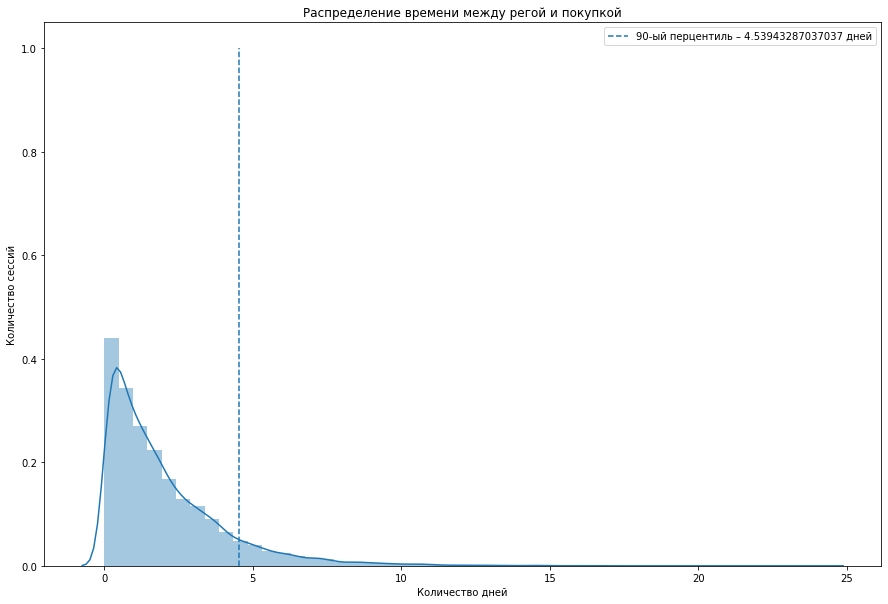

In [223]:
plt.figure(figsize=(15, 10))
sns.distplot(only_purchase['days_to_buy'])
plt.vlines(perc_90, ymin = 0, ymax = 1, linestyles = 'dashed', label = f'90-ый перцентиль – {perc_90} дней')
plt.title('Распределение времени между регой и покупкой')
plt.xlabel('Количество дней')
plt.ylabel('Количество сессий')
plt.legend()
plt.show()

In [224]:
only_purchase['order_within'] = only_purchase['days_to_buy'].apply(lambda x: 1 if x<=perc_90 else 0)

In [225]:
only_purchase

,user_id,date_of_registration,device,geo,marketing,test_group,order_sum,date_of_purchase,days_to_buy,order_within
0,1095855,2020-11-20 18:48:33,tablet,msk,social,small_increase,118949.0,2020-11-21 18:43:28,0.996470,1
1,1095856,2020-11-17 09:56:28,tablet,msk,social,control,175684.0,2020-11-18 04:42:24,0.781898,1
2,1095857,2020-11-03 22:32:45,desktop,world,organic,small_increase,179985.0,2020-11-05 15:45:01,1.716852,1
3,1095858,2020-11-10 08:01:39,tablet,regions,organic,big_increase,161323.0,2020-11-10 22:52:21,0.618542,1
4,1095859,2020-11-08 09:14:19,tablet,spb,referral,small_increase,138890.0,2020-11-08 17:49:30,0.357766,1
...,...,...,...,...,...,...,...,...,...,...
290996,1412270,2020-11-12 19:40:51,mobile,regions,referral,control,1989.0,2020-11-25 00:41:43,12.208935,0
291022,1412297,2020-11-17 08:45:29,mobile,msk,cpc,small_increase,3438.0,2020-11-25 06:21:42,7.900150,0
291033,1412308,2020-11-15 17:51:55,mobile,world,cpc,small_increase,2398.0,2020-11-28 11:26:58,12.732674,0
291082,1412358,2020-11-04 12:18:00,tablet,regions,cpc,small_increase,1420.0,2020-11-12 05:08:10,7.701505,0


In [226]:
def plot_segment_distribution(all_data, segment_columns, test_factor):
    for segment in segment_columns:
        agg_data = all_data.groupby(by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot(x = segment, y = 'user_id', hue = test_factor, data = agg_data, kind = 'bar', height = 4, aspect = 1.5)

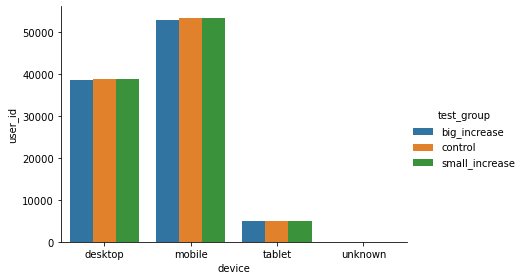

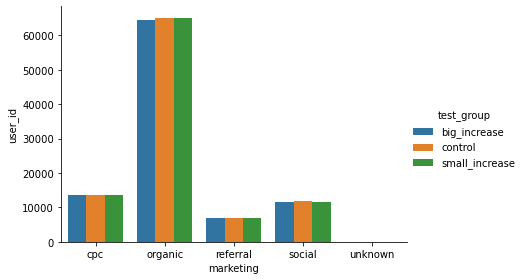

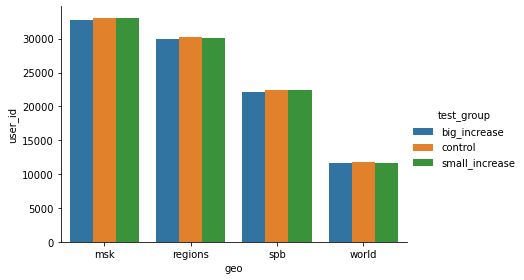

In [227]:
plot_segment_distribution(all_data, ['device', 'marketing', 'geo'], 'test_group')

In [235]:
reg_sum = all_data.groupby(all_data['test_group'])['user_id'].count().reset_index().rename(columns={'user_id': 'reg'})

In [236]:
purch_sum = only_purchase.groupby(new_data['test_group'])['user_id'].count().reset_index().rename(columns={'user_id': 'purchases'})

In [237]:
convers = pd.merge(reg_sum, purch_sum,
                      on = 'test_group')

convers['CR'] = convers['purchases'] / convers['reg']

convers

,test_group,reg,purchases,CR
0,big_increase,96417,10853,0.112563
1,control,97447,11262,0.115571
2,small_increase,97323,10949,0.112502


In [238]:
import statsmodels.stats.proportion as proportion

In [248]:
data_a = convers.iloc[0:2]
data_b = convers.iloc[1:3]
data_c = convers.loc[[0,2]]

In [276]:
data_a

,test_group,reg,purchases,CR
0,big_increase,96417,10853,0.112563
1,control,97447,11262,0.115571


In [277]:
data_b

,test_group,reg,purchases,CR
1,control,97447,11262,0.115571
2,small_increase,97323,10949,0.112502


In [278]:
data_c

,test_group,reg,purchases,CR
0,big_increase,96417,10853,0.112563
2,small_increase,97323,10949,0.112502


In [250]:
chi2stat_a, pval_a, table_a = proportion.proportions_chisquare(data_a['purchases'], data_a['reg'])
pval_a

0.037287170112842376

In [251]:
chi2stat_b, pval_b, table_b = proportion.proportions_chisquare(data_b['purchases'], data_b['reg'])
pval_b

0.03313292774578308

In [252]:
chi2stat_c, pval_c, table_c = proportion.proportions_chisquare(data_c['purchases'], data_c['reg'])
pval_c

0.9658560980172416

In [253]:
alpha = 0.05

print(pval_a, pval_a < alpha)
print(pval_b, pval_b < alpha)
print(pval_c, pval_c < alpha)

0.037287170112842376 True
0.03313292774578308 True
0.9658560980172416 False


In [ ]:
Наблюдается стат значимость при сравнении big_increase и small_increase с контрольной группой

In [264]:
res = pd.DataFrame({'Вариант сравнения': ['A против B', 'A против C', 'B против C'],
                        'p-value (до поправки)': [pval_a, pval_b, pval_c],
                        'Есть ли стат. значимая разница (до поправки)': [True, True, False]})
res

,Вариант сравнения,p-value (до поправки),Есть ли стат. значимая разница (до поправки)
0,A против B,0.037287,True
1,A против C,0.033133,True
2,B против C,0.965856,False


In [265]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [266]:
new_res = multipletests(res['p-value (до поправки)'], alpha=0.05, method='bonferroni')

new_res

(array([False, False, False]),
 array([0.11186151, 0.09939878, 1.        ]),
 0.016952427508441503,
 0.016666666666666666)

In [283]:
res['p-value (после поправки)'] = new_res[1]
res['Есть ли стат. значимая разница (после поправки)'] = new_res[0]
res

,Вариант сравнения,p-value (до поправки),Есть ли стат. значимая разница (до поправки),p-value (после поправки),Есть ли стат. значимая разница (после поправки)
0,A против B,0.037287,True,0.111862,False
1,A против C,0.033133,True,0.099399,False
2,B против C,0.965856,False,1.000000,False


Вероятность, что нулевая гипотеза верная - очень высока.

In [284]:
import statsmodels.stats.power as smp

In [285]:
# Подготовим данные
chipower = smp.GofChisquarePower()

def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

cr_control = convers['CR'].values[1]
cr_small = convers['CR'].values[2]
cr_big = convers['CR'].values[0]
nobs_data_a = min(data_a['reg'])
nobs_data_b = min(data_b['reg'])
nobs_data_c = min(data_c['reg'])

In [286]:
power_data_a = chipower.solve_power(effect_size = chi2_effect_size(cr_control, cr_small), 
                             nobs = nobs_data_a, 
                             alpha = pval_a, 
                             power = None)

power_data_b = chipower.solve_power(effect_size = chi2_effect_size(cr_control, cr_big), 
                             nobs = nobs_data_b, 
                             alpha = pval_b, 
                             power = None)

power_data_c = chipower.solve_power(effect_size = chi2_effect_size(cr_small, cr_big), 
                             nobs = nobs_data_c, 
                             alpha = pval_c, 
                             power = None)

print(f"power_data_a = {power_data_a}\n\
power_data_b = {power_data_b}\n\
power_data_c = {power_data_c}")

power_data_a = 0.7643697186660992
power_data_b = 0.7354232144475417
power_data_c = 0.9659112997148911


In [287]:
res.iloc[0]

Вариант сравнения                                  A против B
p-value (до поправки)                                0.037287
Есть ли стат. значимая разница (до поправки)             True
p-value (после поправки)                             0.111862
Есть ли стат. значимая разница (после поправки)         False
Name: 0, dtype: object

In [289]:
power_data_a = chipower.solve_power(effect_size = chi2_effect_size(cr_control, cr_small), 
                             nobs = nobs_data_a, 
                             alpha = res.iloc[0]['p-value (после поправки)'], 
                             power = None)

power_data_b = chipower.solve_power(effect_size = chi2_effect_size(cr_control, cr_big), 
                             nobs = nobs_data_b, 
                             alpha = res.iloc[1]['p-value (после поправки)'], 
                             power = None)

power_data_c = chipower.solve_power(effect_size = chi2_effect_size(cr_small, cr_big), 
                             nobs = nobs_data_c, 
                             alpha = res.iloc[2]['p-value (после поправки)'], 
                             power = None)

print(f"power_data_a = {power_data_a}\n\
power_data_b = {power_data_b}\n\
power_data_c = {power_data_c}")

power_data_a = 0.8874697622416367
power_data_b = 0.8669341255017622
power_data_c = 1.0


Расчет мощности теста с учетом поправки Бонферрони показал низкую вероятность ошибки второго рода. Длаее необходимо рассчитать объем необходимой для теста выборки

In [297]:
power = 0.8
power_data_a = chipower.solve_power(effect_size = chi2_effect_size(cr_control, cr_small), 
                             nobs = None, 
                             alpha = alpha/3, 
                             power = power)

power_data_b = chipower.solve_power(effect_size = chi2_effect_size(cr_control, cr_big), 
                             nobs = None, 
                             alpha = alpha/3, 
                             power = power)

power_data_c = chipower.solve_power(effect_size = chi2_effect_size(cr_small, cr_big), 
                             nobs = None, 
                             alpha = alpha/3, 
                             power = power)

print(
    power_data_a*2,
    power_data_b*2,
    power_data_c*2
)

256943.06609990707 267553.67256726365 623458670.5687747


Неоьходимый объем выборок для получения стат значимых результатов:
b vs c 256943.06609990707 
c vs s 267553.67256726365 
b vs s 623458670.5687747 

In [298]:
my_bootstrap = pd.merge(purchases, only_purchase[['user_id','test_group']],
                             how = 'inner',
                             on = 'user_id')
my_bootstrap

,user_id,order_sum,test_group
0,1150472,6293.0,control
1,1380513,9408.0,control
2,1249084,2812.0,control
3,1317944,1668.0,control
4,1338139,4946.0,control
...,...,...,...
33059,1412270,1989.0,control
33060,1412297,3438.0,small_increase
33061,1412308,2398.0,small_increase
33062,1412358,1420.0,small_increase


In [301]:
!pip install bootstrapped
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

  Using cached bootstrapped-0.0.2.tar.gz (11 kB)
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13954 sha256=8cd894fc4892bd6c167e1b812e1784711dc734c95bc0065076d8cdc0f11b01c2
  Stored in directory: c:\users\a.seredkin\appdata\local\pip\cache\wheels\a9\7b\e9\000ad8cb18a35a7d68051b362c96a867cd24b7b0c7b478329d
Successfully built bootstrapped


In [302]:
raw_control = my_bootstrap.loc[my_bootstrap['test_group'] == 'control']['order_sum'].values
raw_sm = my_bootstrap.loc[my_bootstrap['test_group'] == 'small_increase']['order_sum'].values
raw_big = my_bootstrap.loc[my_bootstrap['test_group'] == 'big_increase']['order_sum'].values

In [303]:
small_and_control = bs.bootstrap_ab(test = raw_sm, ctrl = raw_control,
                      stat_func = bs_stats.mean,
                      compare_func = bs_compare.difference,
                      return_distribution = True)

control_and_big = bs.bootstrap_ab(test = raw_big, ctrl = raw_control,
                      stat_func = bs_stats.mean,
                      compare_func = bs_compare.difference,
                      return_distribution = True)

big_and_small = bs.bootstrap_ab(test = raw_big, ctrl = raw_control,
                      stat_func = bs_stats.mean,
                      compare_func = bs_compare.difference,
                      return_distribution = True)

In [304]:
borders_small_and_control = np.percentile(small_and_control, [2.5, 97.5])
borders_control_and_big = np.percentile(control_and_big, [2.5, 97.5])
borders_big_and_small = np.percentile(big_and_small, [2.5, 97.5])

C:\Users\a.seredkin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


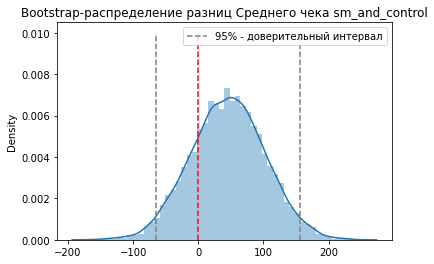

C:\Users\a.seredkin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


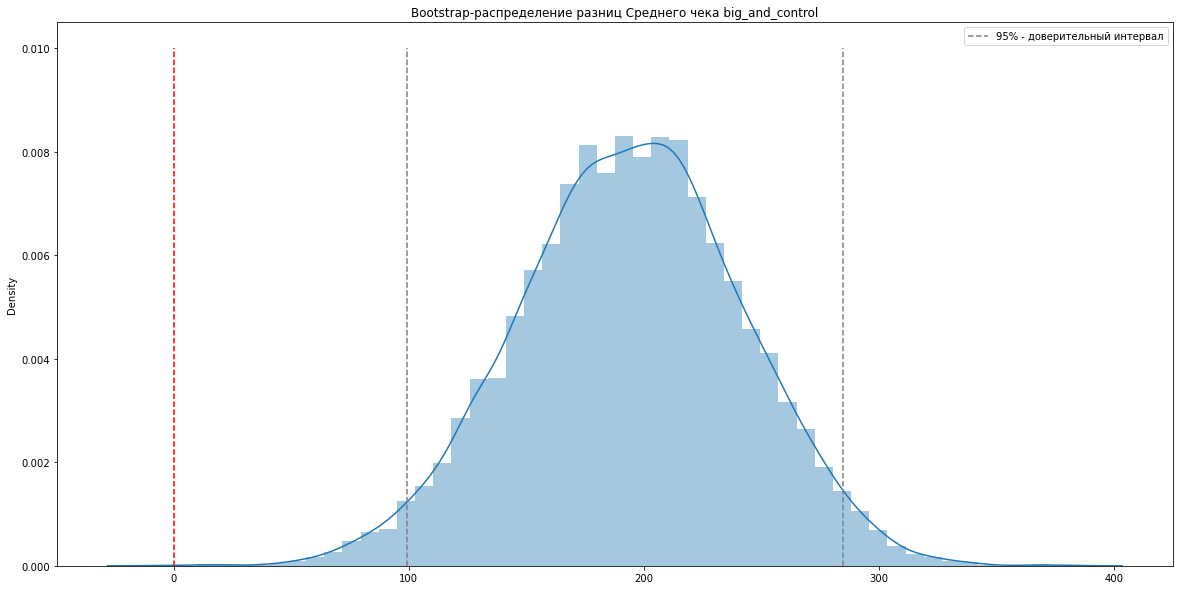

C:\Users\a.seredkin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


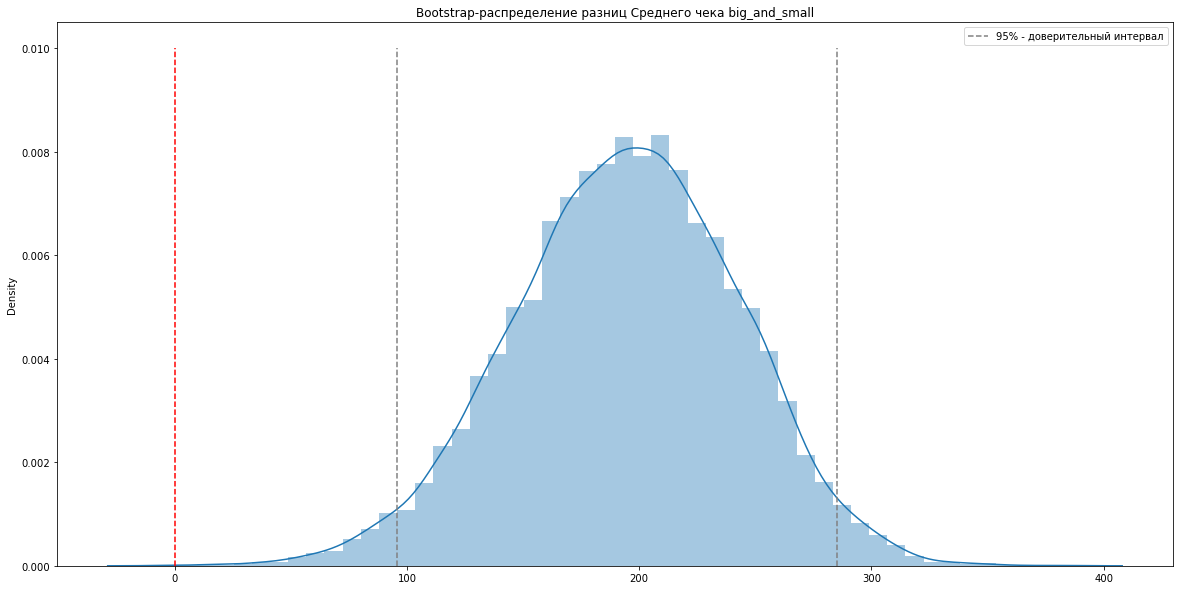

In [305]:
def boot_plot(boot,border,name):
    i = 0
    while i <= len(boot)-1:
        sns.distplot(boot[i])
        plt.title('Bootstrap-распределение разниц Среднего чека ' + str(name[i]))
        plt.rcParams['figure.figsize'] = (20, 10)
        plt.vlines(0, ymin = 0, ymax = 0.01, linestyles = '--', colors = 'red')
        plt.vlines(border[i], ymin = 0, ymax = 0.01, linestyles = '--', colors = 'grey', label = '95% - доверительный интервал')
        plt.legend()
        plt.show()
        i += 1
    return

boot_plot([small_and_control, control_and_big, big_and_small], 
          [borders_small_and_control, borders_control_and_big, borders_big_and_small], 
          ['sm_and_control', 'big_and_control', 'big_and_small'])

Вывод: Cтатистистически значимый прирост среднего чека наблюдается в сегментах повышенной стоимости к контрольным данным, а также к средней стоимости. По итогам проведенного анализа можно сделать вывод, что среднее и высокое изменение цен не должно привести к изменению конверсии, однако анализ мощности теста показал отсутствие необходимого объема выборки для получения стат значимых результатов. Необходимо продолжить сбор данных для анализа. Не смотря на недостаточную мощность теста, мы уже можем быть более уверенными в том, что наше первичное предположение оказалось верным - морепродукты готовы покупать в том же самом объеме даже не смотря на повышение цен.  